# **Neural Network Project** 


# **Part A**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Steps and tasks:**

# **1. Data import and Understanding**

# 1.A. Read the ‘Signals.csv’ as DataFrame and import required libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import tensorflow as tf
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras.layers import Input,InputLayer,Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1) 
tf.random.set_seed(1)
%matplotlib inline

In [4]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NN Project Data - Signal.csv')
data.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#1.B. Check for missing values and print percentage for each attribute

In [5]:
data.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [6]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
percent_missing 

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

#1.C. Check for presence of duplicate records in the dataset and impute with appropriate method. 

In [7]:
data.duplicated().value_counts()

False    1359
True      240
dtype: int64

In [8]:
data=data.drop_duplicates()

# 1.D. Visualise distribution of the target variable.

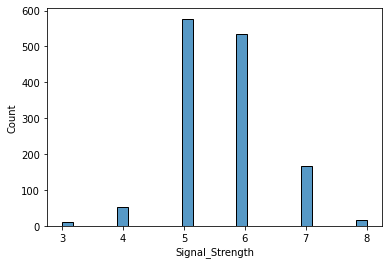

In [9]:
sns.histplot(data=data,x='Signal_Strength');

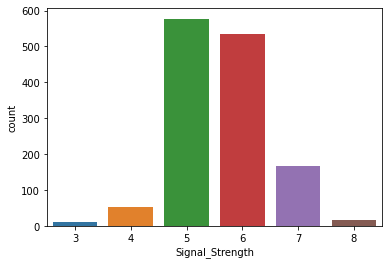

<Figure size 144x504 with 0 Axes>

In [10]:
sns.countplot(data=data,x='Signal_Strength')
plt.figure(figsize=(2,7));

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


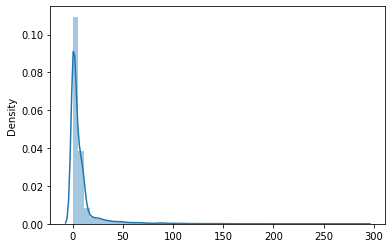

In [11]:
sns.distplot(data);

## E. Share insights from the initial data analysis (at least 2)

- Signal strength of 5 has the highest count compared with other parameters.
- The highest density is more tham 0.10.

# **2. Data preprocessing**

# 2.A. Split the data into X & Y

In [12]:
X = data.drop(labels='Signal_Strength',axis=1)
y = data['Signal_Strength']

# 2.B. Split the data into train & test with 70:30 proportion

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

# 2.C. Print shape of all the 4 variables and verify if train and test data is in sync

In [14]:
X_train.shape

(951, 11)

In [15]:
X_test.shape

(408, 11)

In [16]:
y_train.shape

(951,)

In [17]:
y_test.shape

(408,)

# 2.D. Normalise the train and test data with appropriate method.

In [18]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [19]:
normalizer = preprocessing.Normalizer()
normalized_train_X = normalizer.fit_transform(X_train)
normalized_train_X

array([[0.2955644 , 0.02676056, 0.00479294, ..., 0.13540045, 0.02156821,
        0.37944078],
       [0.17110101, 0.01145507, 0.00377002, ..., 0.10498062, 0.01943011,
        0.35960212],
       [0.10265204, 0.00946009, 0.00040256, ..., 0.07849862, 0.01247927,
        0.25763649],
       ...,
       [0.18498464, 0.00416867, 0.01146384, ..., 0.08728149, 0.01406925,
        0.32307177],
       [0.18384492, 0.00814503, 0.01070489, ..., 0.07795955, 0.0200135 ,
        0.29787531],
       [0.18716307, 0.01391077, 0.00480554, ..., 0.08827015, 0.01719877,
        0.26556921]])

In [20]:
normalizer = preprocessing.Normalizer()
normalized_test_X = normalizer.fit_transform(X_test)
normalized_test_X

array([[4.67493826e-01, 1.65275595e-02, 2.59718792e-02, ...,
        1.53942411e-01, 3.73050628e-02, 5.00548944e-01],
       [2.37615933e-01, 2.56451342e-02, 5.79551055e-03, ...,
        9.01201890e-02, 1.33296743e-02, 2.89775527e-01],
       [2.57478204e-01, 6.74942864e-03, 5.99949212e-03, ...,
        8.04931860e-02, 1.64986033e-02, 3.19972913e-01],
       ...,
       [9.12886029e-02, 4.83292604e-03, 3.31144932e-03, ...,
        2.84605644e-02, 6.89139453e-03, 8.05487673e-02],
       [7.25547328e-02, 6.02919610e-03, 2.04379529e-04, ...,
        3.62773664e-02, 5.41605752e-03, 9.91240715e-02],
       [1.73845850e-01, 1.15114144e-02, 4.46360965e-03, ...,
        7.91703396e-02, 1.19812680e-02, 2.46673165e-01]])

# E. Transform Labels into format acceptable by Neural Network

In [21]:
print(f'Sample value before one hot encode {y_train[0]}\n')
y_train = tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test= tf.keras.utils.to_categorical(y_test, num_classes=10)
print(f'Sample value after one hot encode {y_train[0]}')

Sample value before one hot encode 5

Sample value after one hot encode [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# **3. Model Training & Evaluation using Neural Network**

# A. Design a Neural Network to train a classifier.

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization,LeakyReLU
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers

# B. Train the classifier using previously designed Architecture 

In [23]:
from sklearn.preprocessing import StandardScaler

# Scaling training data
X_Train_S = StandardScaler().fit_transform(X_train)   

# Scaling testing data
X_Test_S = StandardScaler().fit_transform(X_test)   

In [24]:
NN_model_Regressor = Sequential()

# The Input Layer :
NN_model_Regressor.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model_Regressor.add(Dense(64, kernel_initializer='normal',activation='relu'))  # sigmoid, tanh

NN_model_Regressor.add(Dense(32, kernel_initializer='normal'))
NN_model_Regressor.add(LeakyReLU(alpha=0.1))

NN_model_Regressor.add(Dense(16, kernel_initializer='normal'))
NN_model_Regressor.add(LeakyReLU(alpha=0.1))


# The Output Layer :
NN_model_Regressor.add(Dense(1, kernel_initializer='normal'))
NN_model_Regressor.add(LeakyReLU(alpha=0.1))

# Compile the network :
NN_model_Regressor.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
NN_model_Regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 1

In [25]:
EPOCH=200
Network_Regressor=NN_model_Regressor.fit(X_Train_S, y_train, validation_data=(X_Test_S,y_test), epochs=EPOCH, batch_size=200)

Epoch 1/200
5/5 [==============================] - 6s 72ms/step - loss: 0.1002 - accuracy: 0.9000 - val_loss: 0.1001 - val_accuracy: 0.9000
Epoch 2/200
5/5 [==============================] - 0s 18ms/step - loss: 0.1001 - accuracy: 0.9000 - val_loss: 0.1000 - val_accuracy: 0.9000
Epoch 3/200
5/5 [==============================] - 0s 20ms/step - loss: 0.1000 - accuracy: 0.9000 - val_loss: 0.1000 - val_accuracy: 0.9000
Epoch 4/200
5/5 [==============================] - 0s 18ms/step - loss: 0.1000 - accuracy: 0.9000 - val_loss: 0.1001 - val_accuracy: 0.9000
Epoch 5/200
5/5 [==============================] - 0s 20ms/step - loss: 0.1001 - accuracy: 0.9000 - val_loss: 0.1001 - val_accuracy: 0.9000
Epoch 6/200
5/5 [==============================] - 0s 19ms/step - loss: 0.1000 - accuracy: 0.9000 - val_loss: 0.1000 - val_accuracy: 0.9000
Epoch 7/200
5/5 [==============================] - 0s 17ms/step - loss: 0.1000 - accuracy: 0.9000 - val_loss: 0.1000 - val_accuracy: 0.9000
Epoch 8/200
5/5 [===

# C. Plot 2 separate visuals. 

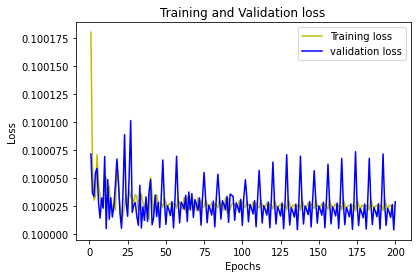

In [26]:
loss_train = Network_Regressor.history['loss']
loss_val = Network_Regressor.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs, loss_train, 'y', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

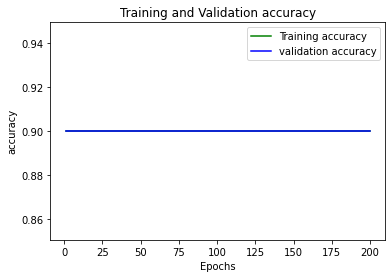

In [27]:
Acc_train = Network_Regressor.history['accuracy']
Acc_val = Network_Regressor.history['val_accuracy']
epochs = range(1,EPOCH+1)
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# D. Design new architecture/update existing architecture in attempt to improve the performance of the model. 

In [28]:
from tensorflow.python.ops.gen_math_ops import Sigmoid
from tensorflow.keras import activations
model=tf.keras.Sequential()
model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))
model.add(Dense(64, kernel_initializer='normal',activation='relu'))
model.add(Dense(32, kernel_initializer='normal'))
model.add(layers.Activation(activations.relu))
model.add(Dense(16, kernel_initializer='normal'))
model.add(layers.Activation(activations.relu))
model.add(Dense(1, kernel_initializer='normal'))
model.add(LeakyReLU(alpha=0.1))
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1536      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 activation_1 (Activation)   (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                

In [29]:
EPOCH=100
Network_Regressor=model.fit(X_Train_S, y_train, validation_data=(X_Test_S,y_test), epochs=EPOCH, batch_size=200)

Epoch 1/100
5/5 [==============================] - 2s 46ms/step - loss: 0.1002 - accuracy: 0.9000 - val_loss: 0.1001 - val_accuracy: 0.9000
Epoch 2/100
5/5 [==============================] - 0s 13ms/step - loss: 0.1002 - accuracy: 0.9000 - val_loss: 0.1002 - val_accuracy: 0.9000
Epoch 3/100
5/5 [==============================] - 0s 11ms/step - loss: 0.1002 - accuracy: 0.9000 - val_loss: 0.1002 - val_accuracy: 0.9000
Epoch 4/100
5/5 [==============================] - 0s 13ms/step - loss: 0.1002 - accuracy: 0.9000 - val_loss: 0.1001 - val_accuracy: 0.9000
Epoch 5/100
5/5 [==============================] - 0s 15ms/step - loss: 0.1001 - accuracy: 0.9000 - val_loss: 0.1000 - val_accuracy: 0.9000
Epoch 6/100
5/5 [==============================] - 0s 15ms/step - loss: 0.1001 - accuracy: 0.9000 - val_loss: 0.1000 - val_accuracy: 0.9000
Epoch 7/100
5/5 [==============================] - 0s 11ms/step - loss: 0.1000 - accuracy: 0.9000 - val_loss: 0.1000 - val_accuracy: 0.9000
Epoch 8/100
5/5 [===

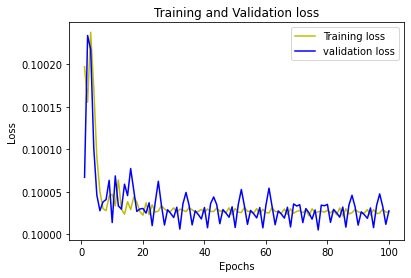

In [30]:
loss_train = Network_Regressor.history['loss']
loss_val = Network_Regressor.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs, loss_train, 'y', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

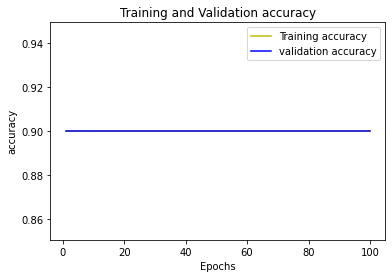

In [31]:
Acc_train = Network_Regressor.history['accuracy']
Acc_val = Network_Regressor.history['val_accuracy']
epochs = range(1,EPOCH+1)
plt.plot(epochs, Acc_train, 'y', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# • PROJECT OBJECTIVE: To build a digit classifier on the SVHN (Street View Housing Number) dataset.

# **Steps and tasks:**

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import tensorflow
import h5py
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense, Reshape, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers, optimizers
import math
%matplotlib inline

# 1.A. Read the .h5 file and assign to a variable

In [34]:
df= h5py.File('/content/drive/MyDrive/Colab Notebooks/Autonomous_Vehicles_SVHN_single_grey1.h5')

# 1.B. Print all the keys from the .h5 file

In [35]:
df.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

# 1.C. Split the data into X_train, X_test, Y_train, Y_test

In [36]:
X_train = df['X_train'][:]
y_train = df['y_train'][:]

X_val = df['X_val'][:]
y_val = df['y_val'][:]

X_test = df['X_test'][:]
y_test = df['y_test'][:]

# 2. Data Visualisation and preprocessing

# A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(42000, 32, 32)
(18000, 32, 32)
(42000,)
(18000,)


# B. Visualise first 10 images in train data and print its corresponding labels

Label for the image is 6


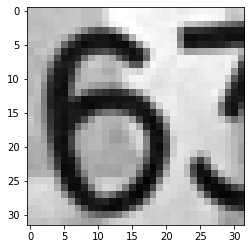

In [38]:
plt.imshow(X_train[1],cmap='gray')
print(f'Label for the image is {y_train[1]}')

label for each of the below image: 2
label for each of the below image: 6
label for each of the below image: 7
label for each of the below image: 4
label for each of the below image: 4
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 7
label for each of the below image: 3


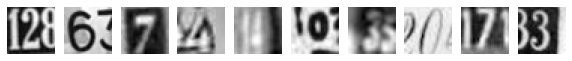

In [39]:
# visualizing the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % ((y_train[i])))
plt.show()

# C. Reshape all the images with appropriate shape update the data in same variable. 

In [40]:
# RESHAPE 2D - 32*32 into 1D - 1024
X_train = X_train.reshape(42000, 32*32)
X_val= X_val.reshape(X_val.shape[0], 32*32)
X_test = X_test.reshape(X_test.shape[0],32*32)

print(f'Shape of X_train is {X_train.shape}')
print(f'Shape of X_val is {X_val.shape}')
print(f'Shape of X_test is {X_test.shape}')

Shape of X_train is (42000, 1024)
Shape of X_val is (60000, 1024)
Shape of X_test is (18000, 1024)


# D. Normalise the images i.e. Normalise the pixel values.

In [41]:
print(f'Min value for Train = {X_train.min()},Validation ={X_val.min()}, Test = {X_test.min()} ')
print(f'Min value for Train = {X_train.max()},Validation ={X_val.max()}, Test = {X_test.max()} ')

Min value for Train = 0.0,Validation =0.0, Test = 0.0 
Min value for Train = 254.97450256347656,Validation =254.97450256347656, Test = 254.97450256347656 


In [42]:
print('Before Normalization')
print(f'Min value is {X_train.min()}')
print(f'Max value is {X_train.max()}\n')
maxVal=X_train.max()
X_train = X_train/maxVal
X_val= X_val/maxVal
X_test = X_test/maxVal

print('After Normalization')
print(f'Min value is {X_train.min()}')
print(f'Max value is {X_train.max()}')

Before Normalization
Min value is 0.0
Max value is 254.97450256347656

After Normalization
Min value is 0.0
Max value is 1.0


# E. Transform Labels into format acceptable by Neural Network

In [43]:
print(f'Sample value before one hot encode {y_train[0]}\n')
y_train = tensorflow.keras.utils.to_categorical(y_train,num_classes=10)
y_val= tensorflow.keras.utils.to_categorical(y_val,num_classes=10)
y_test= tensorflow.keras.utils.to_categorical(y_test, num_classes=10)
print(f'Sample value after one hot encode {y_train[0]}')

Sample value before one hot encode 2

Sample value after one hot encode [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


Label for image at index 1 is 2
Label for image at index 2 is 6
Label for image at index 3 is 7
Label for image at index 4 is 4
Label for image at index 5 is 4
Label for image at index 6 is 0
Label for image at index 7 is 3
Label for image at index 8 is 0
Label for image at index 9 is 7
Label for image at index 10 is 3


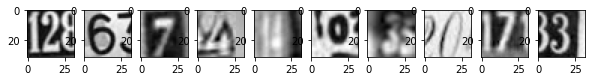

In [44]:
plt.figure(figsize=(10,1))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i].reshape(32,32),cmap='gray')
    print(f'Label for image at index {i+1} is {np.argmax(y_train[0:10][i])}')

# F. Print total Number of classes in the Dataset

In [45]:
df.values

<bound method MappingHDF5.values of <HDF5 file "Autonomous_Vehicles_SVHN_single_grey1.h5" (mode r)>>

# 3. Model Training & Evaluation using Neural Network 

# A. Design a Neural Network to train a classifier

In [46]:
def model(iterations, lr, Lambda, verb=0, eval_test=False):
    scores=[]
    learning_rate=lr
    hidden_nodes=256
    output_nodes=10
    iterations=iterations
    # For early stopping of model.
    callbacks=tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
    #model
    model = Sequential()
    model.add(Dense(500, input_shape=(1024,), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(hidden_nodes,activation='relu'))
    model.add(Dense(hidden_nodes,activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(hidden_nodes,activation='relu'))
    model.add(Dense(hidden_nodes,activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(hidden_nodes,activation='relu'))
    model.add(Dense(hidden_nodes,activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    # adam optmizer with custom learning rate
    adam= optimizers.Adam(lr=learning_rate)
    #Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    #Fit the model
    model.fit(X_train,y_train, validation_data=(X_val,y_val),epochs=iterations,
              batch_size=500, verbose=verb, callbacks=[callbacks])
    
    if eval_test == True:
        score = model.evaluate(X_train,y_train, verbose=0)
        scores.append(score)
        score = model.evaluate(X_val,y_val, verbose=0)
        scores.append(score)
        score = model.evaluate(X_test,y_test, verbose=0)
        scores.append(score)
        return scores
    else:
        score = model.evaluate(X_val,y_val, verbose=(verb+1)%2)
        return score

In [47]:
iterations = 1
lr=0.0001
Lambda=0
score=model(iterations, lr, Lambda)
print(f'\nLoss is {score[0]} and Accuracy is {score[1]}')

1875/1875 [==============================] - 6s 3ms/step - loss: 2.0035 - accuracy: 0.2521

Loss is 2.0034549236297607 and Accuracy is 0.25208333134651184


In [48]:
iterations = 1
lr=1e3
Lambda=0
score=model(iterations, lr, Lambda)
print(f'\nLoss is {score[0]} and Accuracy is {score[1]}')

1875/1875 [==============================] - 5s 3ms/step - loss: 1.8664 - accuracy: 0.3374

Loss is 1.8664329051971436 and Accuracy is 0.3373500108718872


In [49]:
#let's narrow down our search a bit
iterations = 50
lr=1e-4
Lambda=1e-7
score=model(iterations, lr, Lambda)
print(f'Loss is {score[0]} and Accuracy is {score[1]}')

1875/1875 [==============================] - 7s 3ms/step - loss: 0.5005 - accuracy: 0.8515
Loss is 0.50051349401474 and Accuracy is 0.8514833450317383


In [50]:
iterations = 10
lr=2
Lambda=1e-2
score=model(iterations, lr, Lambda)
print(f'Loss is {score[0]} and Accuracy is {score[1]}')

1875/1875 [==============================] - 6s 3ms/step - loss: 0.8115 - accuracy: 0.7498
Loss is 0.8115136027336121 and Accuracy is 0.7497833371162415


In [51]:
import math
results =[]
for i in range(10):
    lr=math.pow(10, np.random.uniform(-4.0,1.0))
    Lambda = math.pow(10, np.random.uniform(-7,-2))
    iterations = 30
    score=model(iterations, lr, Lambda)
    result=f'Loss is {score[0]} and Accuracy is {score[1]} with learing rate {lr} and Lambda {Lambda}\n'
    print(result)
    results.append(result)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.5543 - accuracy: 0.8252
Loss is 0.5542915463447571 and Accuracy is 0.8251500129699707 with learing rate 0.00015823393675604673 and Lambda 4.7202564005487957e-07



1875/1875 [==============================] - 6s 3ms/step - loss: 0.4931 - accuracy: 0.8467
Loss is 0.493091344833374 and Accuracy is 0.8467000126838684 with learing rate 0.0009270048259596675 and Lambda 4.767810720546716e-06



1875/1875 [==============================] - 5s 3ms/step - loss: 0.7574 - accuracy: 0.7618
Loss is 0.7573629021644592 and Accuracy is 0.7618333101272583 with learing rate 0.00018262689366759595 and Lambda 0.00010606788339342442



1875/1875 [==============================] - 7s 4ms/step - loss: 0.5050 - accuracy: 0.8467


Loss is 0.5050493478775024 and Accuracy is 0.8467166423797607 with learing rate 0.03633332449866154 and Lambda 0.00012226581864883674

1875/1875 [==============================] - 6s 3ms/step - loss: 0.6518 - accuracy: 0.7972
Loss is 0.6518426537513733 and Accuracy is 0.797166645526886 with learing rate 0.014513694382424409 and Lambda 0.0017318183665814748



1875/1875 [==============================] - 7s 3ms/step - loss: 0.6894 - accuracy: 0.8008


Loss is 0.6893966197967529 and Accuracy is 0.8008166551589966 with learing rate 0.01863353615112938 and Lambda 1.1940364895464115e-07

1875/1875 [==============================] - 6s 3ms/step - loss: 0.7528 - accuracy: 0.7771
Loss is 0.7528064846992493 and Accuracy is 0.7770833373069763 with learing rate 2.31921356343912 and Lambda 0.00019098872906639304



1875/1875 [==============================] - 6s 3ms/step - loss: 0.6380 - accuracy: 0.7961
Loss is 0.6380055546760559 and Accuracy is 0.7960666418075562 with learing rate 1.3032123988964328 and Lambda 0.005739558214720901



1875/1875 [==============================] - 6s 3ms/step - loss: 0.5228 - accuracy: 0.8366


Loss is 0.5227947235107422 and Accuracy is 0.836566686630249 with learing rate 0.00017970572692763931 and Lambda 1.4974741027433795e-06

1875/1875 [==============================] - 6s 3ms/step - loss: 0.7755 - accuracy: 0.7650
Loss is 0.7754870057106018 and Accuracy is 0.7649666666984558 with learing rate 0.00020735629161346838 and Lambda 1.283185460772339e-05



In [52]:
import math
results =[]
for i in range(20):
    lr=math.pow(10, np.random.uniform(-4.0,-2.0))
    Lambda = math.pow(10, np.random.uniform(-5,-3))
    iterations = 50
    score=model(iterations, lr, Lambda)
    result=f'Loss is {score[0]} and Accuracy is {score[1]} with learing rate {lr} and Lambda {Lambda}\n'
    print(result)
    results.append([result,[score[0],score[1],lr,Lambda]])

1875/1875 [==============================] - 6s 3ms/step - loss: 0.6868 - accuracy: 0.7968
Loss is 0.6868090629577637 and Accuracy is 0.7968166470527649 with learing rate 0.005341439220768722 and Lambda 1.4562903289690153e-05



1875/1875 [==============================] - 6s 3ms/step - loss: 0.7256 - accuracy: 0.7946
Loss is 0.725637674331665 and Accuracy is 0.7945666909217834 with learing rate 0.0008835353003230521 and Lambda 1.7827326546775728e-05



1875/1875 [==============================] - 5s 3ms/step - loss: 0.4395 - accuracy: 0.8700
Loss is 0.43953368067741394 and Accuracy is 0.8699666857719421 with learing rate 0.0035137527971106043 and Lambda 0.0004817750593624292



1875/1875 [==============================] - 6s 3ms/step - loss: 0.5299 - accuracy: 0.8426


Loss is 0.5299082398414612 and Accuracy is 0.8425666689872742 with learing rate 0.00012206239200031281 and Lambda 9.394669065382452e-05

1875/1875 [==============================] - 6s 3ms/step - loss: 0.4576 - accuracy: 0.8664
Loss is 0.4576180577278137 and Accuracy is 0.8663833141326904 with learing rate 0.00030117719783096983 and Lambda 0.0008034291104875342



1875/1875 [==============================] - 7s 3ms/step - loss: 0.4573 - accuracy: 0.8613
Loss is 0.45732927322387695 and Accuracy is 0.8612833619117737 with learing rate 0.0077229861423456165 and Lambda 0.00016899272335759008



1875/1875 [==============================] - 7s 3ms/step - loss: 0.4546 - accuracy: 0.8633


Loss is 0.45460158586502075 and Accuracy is 0.8633166551589966 with learing rate 0.008850642414576849 and Lambda 4.894661778930312e-05

1875/1875 [==============================] - 5s 3ms/step - loss: 0.5228 - accuracy: 0.8414


Loss is 0.5227848887443542 and Accuracy is 0.8414166569709778 with learing rate 0.006247430526625676 and Lambda 7.399288260131775e-05

1875/1875 [==============================] - 6s 3ms/step - loss: 0.5670 - accuracy: 0.8291


Loss is 0.5669613480567932 and Accuracy is 0.8290666937828064 with learing rate 0.00029623016078703546 and Lambda 0.0007614754853777485

1875/1875 [==============================] - 7s 3ms/step - loss: 0.4166 - accuracy: 0.8730


Loss is 0.4166131317615509 and Accuracy is 0.8730166554450989 with learing rate 0.002335802408786735 and Lambda 1.3484137445151448e-05

1875/1875 [==============================] - 6s 3ms/step - loss: 0.3844 - accuracy: 0.8869


Loss is 0.384441077709198 and Accuracy is 0.8868833184242249 with learing rate 0.005506171239648607 and Lambda 0.00025279040708090536

1875/1875 [==============================] - 6s 3ms/step - loss: 0.4574 - accuracy: 0.8621
Loss is 0.45743271708488464 and Accuracy is 0.8620666861534119 with learing rate 0.0016212640246539615 and Lambda 0.00029157467375213894



1875/1875 [==============================] - 6s 3ms/step - loss: 0.4710 - accuracy: 0.8579
Loss is 0.4710265100002289 and Accuracy is 0.8579333424568176 with learing rate 0.0003212758527550177 and Lambda 0.00015884659526528398



1875/1875 [==============================] - 6s 3ms/step - loss: 0.6191 - accuracy: 0.8131
Loss is 0.6191357970237732 and Accuracy is 0.8131166696548462 with learing rate 0.004258320669343495 and Lambda 1.283001962408085e-05



1875/1875 [==============================] - 5s 3ms/step - loss: 0.5004 - accuracy: 0.8494
Loss is 0.5004433989524841 and Accuracy is 0.8493833541870117 with learing rate 0.0001823985336836735 and Lambda 0.0004840515553276743



1875/1875 [==============================] - 6s 3ms/step - loss: 0.6301 - accuracy: 0.8119


Loss is 0.6300926208496094 and Accuracy is 0.8119000196456909 with learing rate 0.0017246133303947025 and Lambda 0.00011549830771083957

1875/1875 [==============================] - 7s 3ms/step - loss: 0.4554 - accuracy: 0.8593


Loss is 0.45536696910858154 and Accuracy is 0.8592666387557983 with learing rate 0.0003137483553822767 and Lambda 3.8918594738558405e-05

1875/1875 [==============================] - 8s 4ms/step - loss: 0.4182 - accuracy: 0.8742


Loss is 0.4182155728340149 and Accuracy is 0.8741833567619324 with learing rate 0.0055638105009326805 and Lambda 6.971590504347666e-05

1875/1875 [==============================] - 6s 3ms/step - loss: 0.7528 - accuracy: 0.7911
Loss is 0.752792477607727 and Accuracy is 0.7911166548728943 with learing rate 0.00013454281534103682 and Lambda 0.0006222574988540566



1875/1875 [==============================] - 7s 3ms/step - loss: 0.4664 - accuracy: 0.8586
Loss is 0.4664064347743988 and Accuracy is 0.8585666418075562 with learing rate 0.0002551300802477648 and Lambda 0.00044921584959265603



In [53]:
lr= 0.001798
Lambda= 0.000878
iterations = 100 
scores = model(iterations, lr, Lambda,verb=0, eval_test=True)

In [54]:
print(f'Training Dataset Loss is {scores[0][0]} Accuracy is {scores[0][1]}\n')
print(f'Validation Dataset Loss is {scores[1][0]} Accuracy is {scores[1][1]}\n')
print(f'Test Dataset Loss is {scores[2][0]} Accuracy is {scores[2][1]}\n')

Training Dataset Loss is 0.48052409291267395 Accuracy is 0.8671190738677979

Validation Dataset Loss is 0.5914874076843262 Accuracy is 0.8475499749183655

Test Dataset Loss is 0.8504034876823425 Accuracy is 0.8018888831138611

